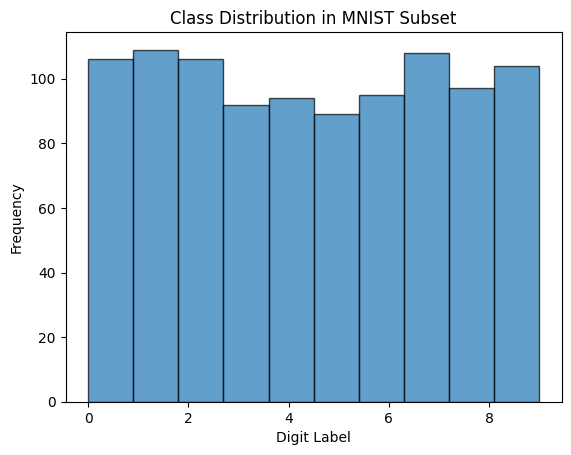

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
transform = transforms.ToTensor()
mnist_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Create a subset of 1000 samples
subset_size = 1000
indices = torch.randperm(len(mnist_dataset))[:subset_size]
mnist_subset = torch.utils.data.Subset(mnist_dataset, indices)

# Extract labels
labels = [mnist_dataset.targets[i].item() for i in indices]

# Plot histogram of class distribution
plt.hist(labels, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.title('Class Distribution in MNIST Subset')
plt.show()


In [3]:
from einops import rearrange

# Convert to tensor
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])

# Reshape into batches of 25
batch_size = 25
num_batches = subset_size // batch_size
batched_images = rearrange(images, '(b n) 1 h w -> b n 1 h w', b=num_batches, n=batch_size)

print(f"Batched shape: {batched_images.shape}")  # Should be (40, 25, 1, 28, 28)


Batched shape: torch.Size([40, 25, 1, 28, 28])


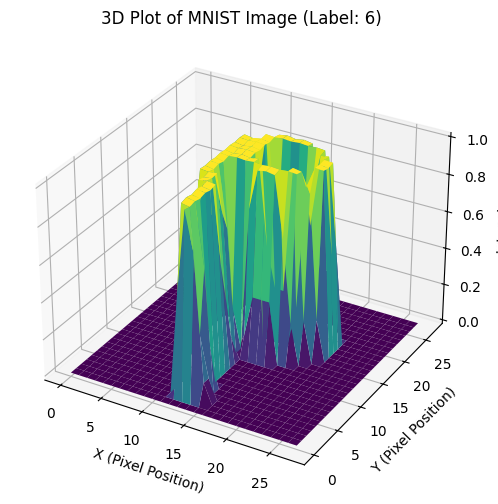

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Select a random image
random_idx = np.random.randint(0, subset_size)
image, label = mnist_subset[random_idx]
image = image.squeeze().numpy()

x, y = np.meshgrid(np.arange(28), np.arange(28))
z = image

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X (Pixel Position)')
ax.set_ylabel('Y (Pixel Position)')
ax.set_zlabel('Intensity')
ax.set_title(f'3D Plot of MNIST Image (Label: {label})')

plt.show()
